In [ ]:
import torch
import json
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
from src import generation

In [2]:
MODEL_DIR = './models'
MODEL_RUN = None

In [3]:
def load_assets(model_dir, model_run=None):
    if not model_run:
        dirs = os.listdir(model_dir)
        model_runs = [d for d in dirs if re.fullmatch(r"^\d{8}_\d{6}$", d)]
        model_runs.sort()
        model_run = model_runs[-1]
    with open(f'{model_dir}/{model_run}/results.json', 'r') as f:
        results = json.load(f)
        results_df = pd.DataFrame(results)
    
    return results_df

In [4]:
results_df = load_assets(MODEL_DIR, MODEL_RUN)

In [8]:
results_df

,step_no,num_tokens,tokens_per_sec,learning_rate,training_loss,token_length
0,0,19435,2059.798896,0.000002,9.260738,44
1,1,19465,15759.440334,0.000004,9.245135,37
2,2,19371,15355.945588,0.000006,9.219543,28
3,3,19457,15856.007781,0.000008,9.181367,14
4,4,19475,23407.243505,0.000010,9.131180,22
...,...,...,...,...,...,...
995,995,19438,15466.543045,0.000022,5.542601,25
996,996,19353,28420.830777,0.000022,5.533251,38
997,997,19464,15709.783659,0.000022,5.503167,12
998,998,19475,16338.026362,0.000022,5.486943,9


<Axes: xlabel='step_no'>

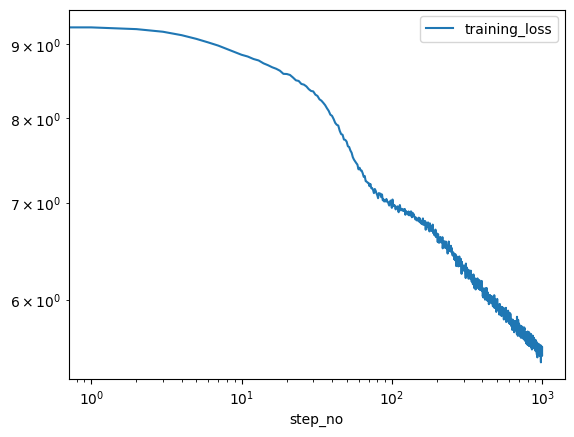

In [14]:
results_df.plot(x="step_no", y="training_loss", loglog=True)

<Axes: xlabel='step_no'>

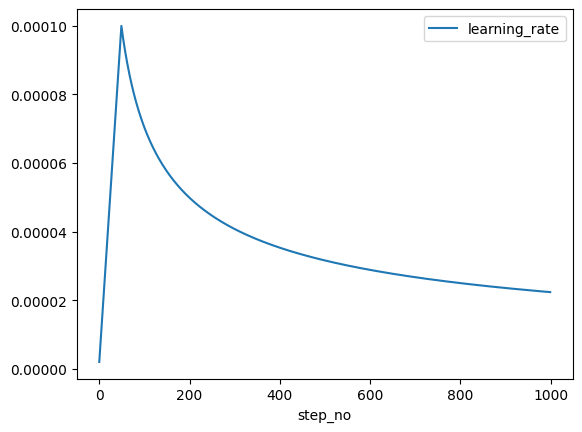

In [15]:
results_df.plot(x="step_no", y="learning_rate")

In [ ]:
translated = generation.generate_translation(
    transformer,
    tokenizers,
    input_text="This is a test sentence.",
    device=DEVICE
    
)   